# Import Libraries

In [ ]:
#Import libraries and rename them
import numpy as np      #Library Documentation: https://numpy.org/doc/
import pandas as pd     #Library Documentation: https://pandas.pydata.org/docs/
import yfinance as yf       #Library Documentation: https://ranaroussi.github.io/yfinance/
import seaborn as sns       #Library Documentation: https://seaborn.pydata.org/

#Rename, not the libraries scipy, matplotlib, but "scipy.stats, matplotlib.pyplot" as "stats, plt", respectively
import scipy.stats as stats     #Library Documentation: https://docs.scipy.org/doc/scipy/
import matplotlib.pyplot as plt     #Library Documentation: https://matplotlib.org/stable/index.html

#From "linear_model" of library sklearn call the objects-classes (for now you may think of them as functions) LinearRegression, Ridge, Lasso
from sklearn.linear_model import LinearRegression, Ridge, Lasso     #Library Documentation: https://scikit-learn.org/stable/

#From library "datetime" import function "datetime()""
from datetime import datetime       #Library Documentation: https://docs.python.org/3/library/datetime.html

#From "metrics" of library sklearn call the functions "mean_absolute_error(), mean_squared_error()"
from sklearn.metrics import mean_absolute_error, mean_squared_error     #Library Documentation: https://scikit-learn.org/stable/

# Import Data

In [ ]:
#Define yf.download() parameters for speeding up the process
start_date = "2010-01-04"
end_date = "2018-01-04"

#Download data from yfinance
#If auto_adjust == False it returns the Adjusted-Close values
#If auto_adjust == True it returns the Close values
dxynyb = yf.download(tickers = "DX-Y.NYB", start = start_date, end = end_date, auto_adjust = False)["Adj Close"]
xau = yf.download(tickers = "^XAU", start = start_date, end = end_date, auto_adjust = False)["Adj Close"]
spy = yf.download(tickers = "SPY", start = start_date, end = end_date, auto_adjust = False)["Adj Close"]
irx = yf.download(tickers = "^IRX", start = start_date, end = end_date, auto_adjust = False)["Adj Close"]
eur_div_usd = yf.download(tickers = "EURUSD=X", start = start_date, end = end_date, auto_adjust = False)["Adj Close"]

#Read from a csv file the US10Y data, which was downloaded from investing.com manually
us10y = pd.read_csv(r"...\Data\United States 10-Year Bond Yield Historical Data (4.1.2010-4.1.2018).csv")
#Set as index of the dataframe called us10y the column containing the dates
us10y.index = us10y["Date"]
us10y = us10y["Price"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [84]:
pd.concat([xau, irx, spy, dxynyb, eur_div_usd], axis = 1).head(10)

Ticker,^XAU,^IRX,SPY,DX-Y.NYB,EURUSD=X
Date,,,,,
2010-01-04,174.020004,0.055,85.279205,77.529999,1.442398
2010-01-05,176.020004,0.060,85.504936,77.620003,1.436596
2010-01-06,180.759995,0.045,85.565155,77.489998,1.440403
2010-01-07,179.210007,0.045,85.926323,77.910004,1.431803
2010-01-08,181.740005,0.040,86.212296,77.470001,1.441109
2010-01-11,182.619995,0.025,86.332687,77.000000,1.451126
2010-01-12,175.919998,0.040,85.527534,76.949997,1.447660
2010-01-13,177.919998,0.050,86.249908,76.849998,1.452391
2010-01-14,176.399994,0.045,86.483177,76.730003,1.449990


In [ ]:
pd.concat()

# Missing Values Detection

In [3]:
#Look for missing values
dxynyb.isna().sum(), xau.isna().sum(), spy.isna().sum(), irx.isna().sum(), us10y.isna().sum(), eur_div_usd.isna().sum()

(Ticker
 DX-Y.NYB    0
 dtype: int64,
 Ticker
 ^XAU    0
 dtype: int64,
 Ticker
 SPY    0
 dtype: int64,
 Ticker
 ^IRX    0
 dtype: int64,
 0,
 Ticker
 EURUSD=X    0
 dtype: int64)

# Construct the Exchange Rates like: rate(t+1) = ( value(t+1) / value(t) ) - 1

In [4]:
#Define a function to construct the exchange rates

#Call: ex_rates = Rates(data = data)
def Rates(data):
    #data: A pandas dataframe, for which we want the exchange rates

    #Create a new dataframe, which will store the exchange rates, 
    # which is constructed by making a copy of the dataframe called "data"
    data_rate = data.copy()

    #Loop the dataset (from the first till the second from the end value)
    for i in range(0, data.shape[0]-1):

        #Assign to each row of the new dataframe the exchange rate 
        data_rate.iloc[i] = (data.iloc[i+1]/data.iloc[(i)]) - 1

    #From the new dataframe, with the exchange rate values, remove the last value, 
    # because it's not an exchange rate (due to the recursive formula)
    data_rate = data_rate.iloc[0:-1]

    #Return the dataframe containing the exchange rates
    return(data_rate)

In [5]:
#Create the exchange rates for each variable
#Note that "Rates(dxynyb)["DX-Y.NYB"]" gives a pd.Series() object but we make it a pd.DataFrame() with,
# "pd.DataFrame(Rates(dxynyb)["DX-Y.NYB"])"
dxynyb_rates = pd.DataFrame(Rates(dxynyb)["DX-Y.NYB"])
xau_rates = pd.DataFrame(Rates(xau)["^XAU"])
spy_rates = pd.DataFrame(Rates(spy)["SPY"])
irx_rates = pd.DataFrame(Rates(irx)["^IRX"])
eur_div_usd_rates = pd.DataFrame(Rates(eur_div_usd)["EURUSD=X"])

#Different format, becuase it's not downloaded from yfinance
us10y_rates = pd.DataFrame(Rates(us10y))
#Rename the variable from "Price" to "US10Y"
us10y_rates = us10y_rates.rename(columns = {"Price":"US10Y"})

# Descriptive Statistics

In [6]:
#View some desciptive statistics
pd.concat([dxynyb_rates, xau_rates, spy_rates, irx_rates, us10y_rates, eur_div_usd_rates], axis = 1).describe().iloc[[1, 2, 3, 7]]

,DX-Y.NYB,^XAU,SPY,^IRX,US10Y,EURUSD=X
mean,0.000097,-0.000066,0.000555,0.072225,0.000045,-0.000067
std,0.004716,0.023568,0.009213,0.562094,0.022703,0.006065
min,-0.023702,-0.102768,-0.065123,-0.943396,-0.104358,-0.025855
max,0.020528,0.104278,0.046499,11.666666,0.113604,0.031756


In [7]:
#Check the shapes of the dtaframes containing the exchange rates ---> (n_rows, n_columns)
dxynyb_rates.shape, xau_rates.shape, spy_rates.shape, irx_rates.shape, us10y_rates.shape, eur_div_usd_rates.shape

((2013, 1), (2014, 1), (2014, 1), (2012, 1), (2096, 1), (2083, 1))

In [ ]:
#Required due to the nature of the data downlaoded from investing.com (variable: us10y_rates)
#Create a new variable, let's say "Dates" to dataframe called "us10y_rates" to store the date
us10y_rates["Dates"] = us10y_rates.index

#Loop the dates
for i in us10y_rates.index:

    #For each date of the form e.x. "1/4/2016" turn it into "2016-1-4" and assign it to the variable "Dates" of the dataframe "us10y_rates"
    us10y_rates.loc[i, "Dates"] = pd.Timestamp(datetime.strptime(us10y_rates.loc[i, "Dates"], "%m/%d/%Y").strftime("%Y-%m-%d"))

#Set as indices the transformed variable "Dates"
us10y_rates.index = us10y_rates["Dates"]
#Drop the variable "Dates"
us10y_rates = us10y_rates.drop(["Dates"], axis = 1)

C:\Users\iakov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\indexes\base.py:7659: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(index_like, name=name, copy=copy)


# Data Formating

In [9]:
#Constructing a dataframe
data = pd.concat([dxynyb_rates, xau_rates, spy_rates, irx_rates, eur_div_usd_rates, us10y_rates], axis  = 1)

#Remove missing values according to the index
data = data.dropna()

#Check the dimensions of the dataframe
data.shape

(2005, 6)

In [10]:
#Set as Y the dxynyb_rates
Y = data.loc[:, data.columns[0]]
#Construct a dataframe X, whose role is to aid us in forecasting the Y variable ("dxynyb_rates")
X = data.loc[:, data.columns[1:]]

#Check the dimensions of X and Y
X.shape, Y.shape

((2005, 5), (2005,))

# Correlation Coefficients

# Pearson

<Axes: >

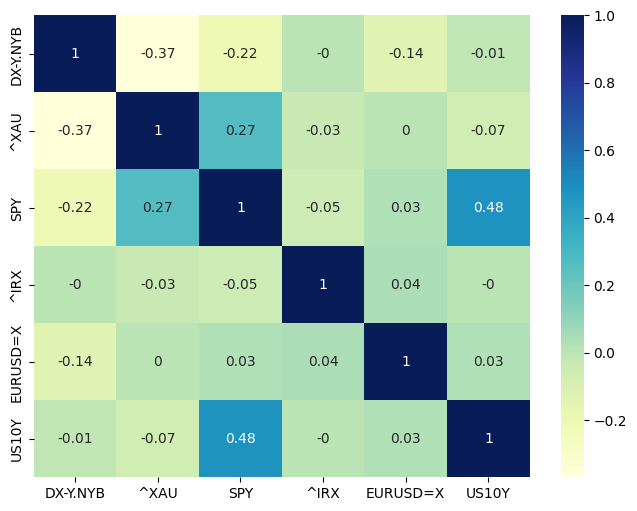

In [11]:
#Pearson Correlation Coefficient for discovering linear correlations
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
sns.heatmap(round(data.corr(method = "pearson"), 2), cmap = "YlGnBu", annot = True, ax = ax)

# Spearman

<Axes: >

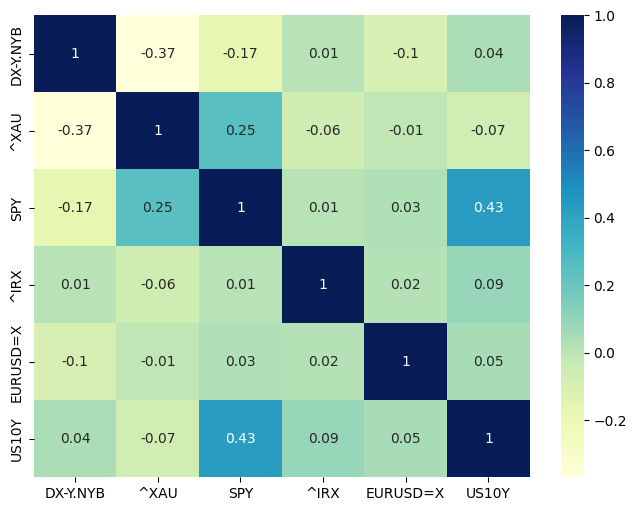

In [12]:
#Spearman Correlation Coefficient for discovering non-linear correlations
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
sns.heatmap(round(data.corr(method = "spearman"), 2), cmap = "YlGnBu", annot = True, ax = ax)

# Data Splitting

In [13]:
#Set the first 1500 values as training data and the rest as testing data
X_train = X.iloc[0:1500]
X_test = X.iloc[1500:]
Y_train = Y.iloc[0:1500]
Y_test = Y.iloc[1500:]

#Transform the pandas dataframe to numpy array
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

#Always check the dimensions of X_train, X_test, Y_train, Y_test
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1500, 5), (1500,), (505, 5), (505,))

# OLS Regression

In [14]:
#Set the OLS regression algorithm, with it's hyperparameters
LR_Model = LinearRegression(fit_intercept = True, 
                            n_jobs = -1, 
                            tol = 1e-05)
           #
           #
           #

#Fit the training data to the OLS regression algorithm
LR_Model.fit(X = X_train, 
             y = Y_train)

#Based in the "trained" parameters (via the training data),
# of the OLS algorithm make predictions for the future values
Y_test_pred_LR = LR_Model.predict(X_test)

# Ridge Regression

# for alpha == 0 falls to OLS Regression

In [163]:
#Set the Ridge regression algorithm, with it's hyperparameters
Ridge_Model_1 = Ridge(alpha = 0,
                      fit_intercept = True,
                      max_iter = 2000,
                      tol = 1e-2,
                      solver = "cholesky")
                #
                #
                #

#Fit the training data to the Ridge regression algorithm
Ridge_Model_1.fit(X = X_train, 
                  y = Y_train)

#Based in the "trained" parameters (via the training data),
# of the Ridge algorithm make predictions for the future values
Y_test_pred_Ridge_1 = Ridge_Model_1.predict(X_test)

# for alpha == 0.0001

In [164]:
#Set the Ridge regression algorithm, with it's hyperparameters
Ridge_Model_2 = Ridge(alpha = 0.0001,
                      fit_intercept = True,
                      max_iter = 2000,
                      tol = 1e-2,
                      solver = "cholesky")
                #
                #
                #

#Fit the training data to the Ridge regression algorithm
Ridge_Model_2.fit(X = X_train, 
                  y = Y_train)

#Based in the "trained" parameters (via the training data),
# of the Ridge algorithm make predictions for the future values
Y_test_pred_Ridge_2 = Ridge_Model_2.predict(X_test)

# for alpha == 0.001

In [165]:
#Set the Ridge regression algorithm, with it's hyperparameters
Ridge_Model_3 = Ridge(alpha = 0.001,
                      fit_intercept = True,
                      max_iter = 2000,
                      tol = 1e-2,
                      solver = "cholesky")
                #
                #
                #

#Fit the training data to the Ridge regression algorithm
Ridge_Model_3.fit(X = X_train, 
                  y = Y_train)

#Based in the "trained" parameters (via the training data),
# of the Ridge algorithm make predictions for the future values
Y_test_pred_Ridge_3 = Ridge_Model_3.predict(X_test)

# for alpha == 0.05

In [166]:
#Set the Ridge regression algorithm, with it's hyperparameters
Ridge_Model_4 = Ridge(alpha = 0.05,
                      fit_intercept = True,
                      max_iter = 2000,
                      tol = 1e-2,
                      solver = "cholesky")
                #
                #
                #

#Fit the training data to the Ridge regression algorithm
Ridge_Model_4.fit(X = X_train, 
                  y = Y_train)

#Based in the "trained" parameters (via the training data),
# of the Ridge algorithm make predictions for the future values
Y_test_pred_Ridge_4 = Ridge_Model_4.predict(X_test)

# for alpha == 0.08

In [167]:
#Set the Ridge regression algorithm, with it's hyperparameters
Ridge_Model_5 = Ridge(alpha = 0.08,
                      fit_intercept = True,
                      max_iter = 2000,
                      tol = 1e-2,
                      solver = "cholesky")
                #
                #
                #

#Fit the training data to the Ridge regression algorithm
Ridge_Model_5.fit(X = X_train, 
                  y = Y_train)

#Based in the "trained" parameters (via the training data),
# of the Ridge algorithm make predictions for the future values
Y_test_pred_Ridge_5 = Ridge_Model_5.predict(X_test)

# Lasso Regression

# for alpha == 1e-10

In [140]:
#Set the Lasso regression algorithm, with it's hyperparameters
Lasso_Model_1 = Lasso(alpha = 1e-10, 
                      fit_intercept = True,
                      max_iter = 2000,
                      tol = 1e-02,
                      warm_start = False,
                      selection = "random")
                #
                #
                #

#Fit the training data to the Lasso regression algorithm
Lasso_Model_1.fit(X = X_train, 
                  y = Y_train)

#Based in the "trained" parameters (via the training data),
# of the Lasso algorithm make predictions for the future values
Y_test_pred_Lasso_1 = Lasso_Model_1.predict(X_test)

# for alpha == 1e-5

In [143]:
#Set the Lasso regression algorithm, with it's hyperparameters
Lasso_Model_2 = Lasso(alpha = 1e-5, 
                      fit_intercept = True,
                      max_iter = 2000,
                      tol = 1e-02,
                      warm_start = False,
                      selection = "random")
                #
                #
                #

#Fit the training data to the Lasso regression algorithm
Lasso_Model_2.fit(X = X_train, 
                  y = Y_train)

#Based in the "trained" parameters (via the training data),
# of the Lasso algorithm make predictions for the future values
Y_test_pred_Lasso_2 = Lasso_Model_2.predict(X_test)

# for alpha == 1e-4

In [144]:
#Set the Lasso regression algorithm, with it's hyperparameters
Lasso_Model_3 = Lasso(alpha = 1e-4, 
                      fit_intercept = True,
                      max_iter = 2000,
                      tol = 1e-02,
                      warm_start = False,
                      selection = "random")
                #
                #
                #

#Fit the training data to the Lasso regression algorithm
Lasso_Model_3.fit(X = X_train, 
                  y = Y_train)

#Based in the "trained" parameters (via the training data),
# of the Lasso algorithm make predictions for the future values
Y_test_pred_Lasso_3 = Lasso_Model_3.predict(X_test)

# for alpha == 1e-3

In [145]:
#Set the Lasso regression algorithm, with it's hyperparameters
Lasso_Model_4 = Lasso(alpha = 1e-3, 
                      fit_intercept = True,
                      max_iter = 2000,
                      tol = 1e-02,
                      warm_start = False,
                      selection = "random")
                #
                #
                #

#Fit the training data to the Lasso regression algorithm
Lasso_Model_4.fit(X = X_train, 
                  y = Y_train)

#Based in the "trained" parameters (via the training data),
# of the Lasso algorithm make predictions for the future values
Y_test_pred_Lasso_4 = Lasso_Model_4.predict(X_test)

# Evaluation

In [ ]:
#Create an empty dataframe to store the regression error metric results
Results = pd.DataFrame()

#y_true: True values
#y_pred: Predicted values

#Create a new column, let's say "MAE", which stands for Mean Absolute Error
Results["MAE"] = [mean_absolute_error(y_true = Y_test, 
                                      y_pred = Y_test_pred_LR),
                  mean_absolute_error(y_true = Y_test, 
                                      y_pred = Y_test_pred_Ridge_1),
                  mean_absolute_error(y_true = Y_test, 
                                      y_pred = Y_test_pred_Ridge_2),
                  mean_absolute_error(y_true = Y_test, 
                                      y_pred = Y_test_pred_Ridge_3),
                  mean_absolute_error(y_true = Y_test, 
                                      y_pred = Y_test_pred_Ridge_4),
                  mean_absolute_error(y_true = Y_test, 
                                      y_pred = Y_test_pred_Ridge_5),
                  mean_absolute_error(y_true = Y_test, 
                                      y_pred = Y_test_pred_Lasso_1),
                  mean_absolute_error(y_true = Y_test, 
                                      y_pred = Y_test_pred_Lasso_2),
                  mean_absolute_error(y_true = Y_test, 
                                      y_pred = Y_test_pred_Lasso_3),
                  mean_absolute_error(y_true = Y_test, 
                                      y_pred = Y_test_pred_Lasso_4),]

#Create a new column, let's say "MAPE", which stands for Mean Absolute Percentage Error
Results["MAPE"] = [100*np.sum( np.abs((Y_test - Y_test_pred_LR) / Y_test)) / (Y_test.shape[0]), 
                   100*np.sum( np.abs((Y_test - Y_test_pred_Ridge_1) / Y_test)) / (Y_test.shape[0]),
                   100*np.sum( np.abs((Y_test - Y_test_pred_Ridge_2) / Y_test)) / (Y_test.shape[0]),
                   100*np.sum( np.abs((Y_test - Y_test_pred_Ridge_3) / Y_test)) / (Y_test.shape[0]),
                   100*np.sum( np.abs((Y_test - Y_test_pred_Ridge_4) / Y_test)) / (Y_test.shape[0]),
                   100*np.sum( np.abs((Y_test - Y_test_pred_Ridge_5) / Y_test)) / (Y_test.shape[0]),
                   100*np.sum( np.abs((Y_test - Y_test_pred_Lasso_1) / Y_test)) / (Y_test.shape[0]),
                   100*np.sum( np.abs((Y_test - Y_test_pred_Lasso_2) / Y_test)) / (Y_test.shape[0]),
                   100*np.sum( np.abs((Y_test - Y_test_pred_Lasso_3) / Y_test)) / (Y_test.shape[0]),
                   100*np.sum( np.abs((Y_test - Y_test_pred_Lasso_4) / Y_test)) / (Y_test.shape[0]),]

#Create a new column, let's say "SMAPE", which stands for Symmetric Mean Absolute Percentage Error
Results["SMAPE"] = [2*100*np.sum( np.abs((Y_test - Y_test_pred_LR)) / (np.abs(Y_test) + np.abs(Y_test_pred_LR))) / (Y_test.shape[0]),
                    2*100*np.sum( np.abs((Y_test - Y_test_pred_Ridge_1)) / (np.abs(Y_test) + np.abs(Y_test_pred_Ridge_1))) / (Y_test.shape[0]),
                    2*100*np.sum( np.abs((Y_test - Y_test_pred_Ridge_2)) / (np.abs(Y_test) + np.abs(Y_test_pred_Ridge_2))) / (Y_test.shape[0]),
                    2*100*np.sum( np.abs((Y_test - Y_test_pred_Ridge_3)) / (np.abs(Y_test) + np.abs(Y_test_pred_Ridge_3))) / (Y_test.shape[0]),
                    2*100*np.sum( np.abs((Y_test - Y_test_pred_Ridge_4)) / (np.abs(Y_test) + np.abs(Y_test_pred_Ridge_4))) / (Y_test.shape[0]),
                    2*100*np.sum( np.abs((Y_test - Y_test_pred_Ridge_5)) / (np.abs(Y_test) + np.abs(Y_test_pred_Ridge_5))) / (Y_test.shape[0]),
                    2*100*np.sum( np.abs((Y_test - Y_test_pred_Lasso_1)) / (np.abs(Y_test) + np.abs(Y_test_pred_Lasso_1))) / (Y_test.shape[0]),
                    2*100*np.sum( np.abs((Y_test - Y_test_pred_Lasso_2)) / (np.abs(Y_test) + np.abs(Y_test_pred_Lasso_2))) / (Y_test.shape[0]),
                    2*100*np.sum( np.abs((Y_test - Y_test_pred_Lasso_3)) / (np.abs(Y_test) + np.abs(Y_test_pred_Lasso_3))) / (Y_test.shape[0]),
                    2*100*np.sum( np.abs((Y_test - Y_test_pred_Lasso_4)) / (np.abs(Y_test) + np.abs(Y_test_pred_Lasso_4))) / (Y_test.shape[0])]

#Create a new column, let's say "MSE", which stands for Mean Squared Error
Results["MSE"] = [mean_squared_error(y_true = Y_test, 
                                     y_pred = Y_test_pred_LR),
                  mean_squared_error(y_true = Y_test, 
                                     y_pred = Y_test_pred_Ridge_1),
                  mean_squared_error(y_true = Y_test, 
                                     y_pred = Y_test_pred_Ridge_2),
                  mean_squared_error(y_true = Y_test, 
                                     y_pred = Y_test_pred_Ridge_3),
                  mean_squared_error(y_true = Y_test, 
                                     y_pred = Y_test_pred_Ridge_4),
                  mean_squared_error(y_true = Y_test, 
                                     y_pred = Y_test_pred_Ridge_5),
                  mean_squared_error(y_true = Y_test, 
                                     y_pred = Y_test_pred_Lasso_1),
                  mean_squared_error(y_true = Y_test, 
                                     y_pred = Y_test_pred_Lasso_2),
                  mean_squared_error(y_true = Y_test, 
                                     y_pred = Y_test_pred_Lasso_3),
                  mean_squared_error(y_true = Y_test, 
                                     y_pred = Y_test_pred_Lasso_4)]

#Create a new column, let's say "RMSE", which stands for Root Mean Squared Error
Results["RMSE"] = [np.sqrt(mean_squared_error(y_true = Y_test, 
                                              y_pred = Y_test_pred_LR)),
                   np.sqrt(mean_squared_error(y_true = Y_test, 
                                              y_pred = Y_test_pred_Ridge_1)),
                   np.sqrt(mean_squared_error(y_true = Y_test, 
                                              y_pred = Y_test_pred_Ridge_2)),
                   np.sqrt(mean_squared_error(y_true = Y_test, 
                                              y_pred = Y_test_pred_Ridge_3)),
                   np.sqrt(mean_squared_error(y_true = Y_test, 
                                              y_pred = Y_test_pred_Ridge_4)),
                   np.sqrt(mean_squared_error(y_true = Y_test, 
                                              y_pred = Y_test_pred_Ridge_5)),
                   np.sqrt(mean_squared_error(y_true = Y_test, 
                                              y_pred = Y_test_pred_Lasso_1)),
                   np.sqrt(mean_squared_error(y_true = Y_test, 
                                              y_pred = Y_test_pred_Lasso_2)),
                   np.sqrt(mean_squared_error(y_true = Y_test, 
                                              y_pred = Y_test_pred_Lasso_3)),
                   np.sqrt(mean_squared_error(y_true = Y_test, 
                                              y_pred = Y_test_pred_Lasso_4)),]

#Create a new column, let's say "OLS-R2", which stands for the standard OLS R2 metric (has assumptions)
Results["OLS-R2"] = [1 - ( np.sum((Y_test - Y_test_pred_LR)**2) / np.sum((Y_test - sum(Y_test)/Y_test.shape[0])**2)),
                     1 - ( np.sum((Y_test - Y_test_pred_Ridge_1)**2) / np.sum((Y_test - sum(Y_test)/Y_test.shape[0])**2)),
                     1 - ( np.sum((Y_test - Y_test_pred_Ridge_2)**2) / np.sum((Y_test - sum(Y_test)/Y_test.shape[0])**2)),
                     1 - ( np.sum((Y_test - Y_test_pred_Ridge_3)**2) / np.sum((Y_test - sum(Y_test)/Y_test.shape[0])**2)),
                     1 - ( np.sum((Y_test - Y_test_pred_Ridge_4)**2) / np.sum((Y_test - sum(Y_test)/Y_test.shape[0])**2)),
                     1 - ( np.sum((Y_test - Y_test_pred_Ridge_5)**2) / np.sum((Y_test - sum(Y_test)/Y_test.shape[0])**2)),
                     1 - ( np.sum((Y_test - Y_test_pred_Lasso_1)**2) / np.sum((Y_test - sum(Y_test)/Y_test.shape[0])**2)),
                     1 - ( np.sum((Y_test - Y_test_pred_Lasso_2)**2) / np.sum((Y_test - sum(Y_test)/Y_test.shape[0])**2)),
                     1 - ( np.sum((Y_test - Y_test_pred_Lasso_3)**2) / np.sum((Y_test - sum(Y_test)/Y_test.shape[0])**2)),
                     1 - ( np.sum((Y_test - Y_test_pred_Lasso_4)**2) / np.sum((Y_test - sum(Y_test)/Y_test.shape[0])**2)),]

#Create a new column, let's say "OOS-R2", which stands for Out-Of-Sample R2
Results["OOS-R2"] = [1 - ( (np.sum((Y_test - Y_test_pred_LR)**2)) / (np.sum((Y_test - (np.sum(Y_train)/Y_train.shape[0]))**2)) ),
                     1 - ( (np.sum((Y_test - Y_test_pred_Ridge_1)**2)) / (np.sum((Y_test - (np.sum(Y_train)/Y_train.shape[0]))**2)) ),
                     1 - ( (np.sum((Y_test - Y_test_pred_Ridge_2)**2)) / (np.sum((Y_test - (np.sum(Y_train)/Y_train.shape[0]))**2)) ),
                     1 - ( (np.sum((Y_test - Y_test_pred_Ridge_3)**2)) / (np.sum((Y_test - (np.sum(Y_train)/Y_train.shape[0]))**2)) ),
                     1 - ( (np.sum((Y_test - Y_test_pred_Ridge_4)**2)) / (np.sum((Y_test - (np.sum(Y_train)/Y_train.shape[0]))**2)) ),
                     1 - ( (np.sum((Y_test - Y_test_pred_Ridge_5)**2)) / (np.sum((Y_test - (np.sum(Y_train)/Y_train.shape[0]))**2)) ),
                     1 - ( (np.sum((Y_test - Y_test_pred_Lasso_1)**2)) / (np.sum((Y_test - (np.sum(Y_train)/Y_train.shape[0]))**2)) ),
                     1 - ( (np.sum((Y_test - Y_test_pred_Lasso_2)**2)) / (np.sum((Y_test - (np.sum(Y_train)/Y_train.shape[0]))**2)) ),
                     1 - ( (np.sum((Y_test - Y_test_pred_Lasso_3)**2)) / (np.sum((Y_test - (np.sum(Y_train)/Y_train.shape[0]))**2)) ),
                     1 - ( (np.sum((Y_test - Y_test_pred_Lasso_4)**2)) / (np.sum((Y_test - (np.sum(Y_train)/Y_train.shape[0]))**2)) )]

#Rename the rows of the dataframe, so that each row,
# represents the regression error metrics for each regression algorithm
Results.rename(index = {0:"OLS", 
                        1:"Ridge - alpha == 0", 
                        2:"Ridge - alpha == 0.0001", 
                        3:"Ridge - alpha == 0.001", 
                        4:"Ridge - alpha == 0.05", 
                        5:"Ridge - alpha == 0.08", 
                        6:"Lasso - alpha == 1e-10",
                        7:"Lasso - alpha == 1e-5",
                        8:"Lasso - alpha == 1e-4",
                        9:"Lasso - alpha == 1e-3",}, 
               inplace = True)
        #inplace: if set to True it replaces the indices with the new names

C:\Users\iakov\AppData\Local\Temp\ipykernel_15620\747340332.py:30: RuntimeWarning: divide by zero encountered in divide
  Results["MAPE"] = [100*np.sum( np.abs((Y_test - Y_test_pred_LR) / Y_test)) / (Y_test.shape[0]),
C:\Users\iakov\AppData\Local\Temp\ipykernel_15620\747340332.py:31: RuntimeWarning: divide by zero encountered in divide
  100*np.sum( np.abs((Y_test - Y_test_pred_Ridge_1) / Y_test)) / (Y_test.shape[0]),
C:\Users\iakov\AppData\Local\Temp\ipykernel_15620\747340332.py:32: RuntimeWarning: divide by zero encountered in divide
  100*np.sum( np.abs((Y_test - Y_test_pred_Ridge_2) / Y_test)) / (Y_test.shape[0]),
C:\Users\iakov\AppData\Local\Temp\ipykernel_15620\747340332.py:33: RuntimeWarning: divide by zero encountered in divide
  100*np.sum( np.abs((Y_test - Y_test_pred_Ridge_3) / Y_test)) / (Y_test.shape[0]),
C:\Users\iakov\AppData\Local\Temp\ipykernel_15620\747340332.py:34: RuntimeWarning: divide by zero encountered in divide
  100*np.sum( np.abs((Y_test - Y_test_pred_Ridge_4

In [169]:
#View the results
#Select the one with the lowest MSE, or lowest SMAPE, or highest OOS-R2
Results

,MAE,MAPE,SMAPE,MSE,RMSE,OLS-R2,OOS-R2
OLS,0.002977,inf,139.202941,0.000015,0.003900,0.165444,0.168673
Ridge - alpha == 0,0.002977,inf,139.202941,0.000015,0.003900,0.165444,0.168673
Ridge - alpha == 0.0001,0.002977,inf,139.207941,0.000015,0.003900,0.165479,0.168708
Ridge - alpha == 0.001,0.002977,inf,139.251241,0.000015,0.003899,0.165783,0.169010
Ridge - alpha == 0.05,0.002971,inf,140.888105,0.000015,0.003888,0.170400,0.173610
Ridge - alpha == 0.08,0.002972,inf,142.057652,0.000015,0.003890,0.169473,0.172686
Lasso - alpha == 1e-10,0.002977,inf,139.203121,0.000015,0.003900,0.165444,0.168672
Lasso - alpha == 1e-5,0.002937,inf,142.977227,0.000015,0.003876,0.175757,0.178946
Lasso - alpha == 1e-4,0.003249,inf,180.052423,0.000018,0.004277,-0.003884,0.000000
Lasso - alpha == 1e-3,0.003249,inf,180.052423,0.000018,0.004277,-0.003884,0.000000


# Regression Coefficients

In [149]:
#Regression coefficients
print("OLS Coefficients:", LR_Model.coef_)
print("Ridge - alpha == 0, Coefficients:", Ridge_Model_1.coef_)
print("Ridge - alpha == 0.0001, Coefficients:", Ridge_Model_2.coef_)
print("Ridge - alpha == 0.001, Coefficients:", Ridge_Model_3.coef_)
print("Ridge - alpha == 0.05, Coefficients:", Ridge_Model_4.coef_)
print("Ridge - alpha == 0.08, Coefficients:", Ridge_Model_5.coef_)
print("Lasso - alpha == 1e-10, Coefficients:", Lasso_Model_1.coef_)
print("Lasso - alpha == 1e-5, Coefficients:", Lasso_Model_2.coef_)
print("Lasso - alpha == 1e-4, Coefficients:", Lasso_Model_3.coef_)
print("Lasso - alpha == 1e-3, Coefficients:", Lasso_Model_4.coef_)

OLS Coefficients: [-0.06077354 -0.09317868 -0.00017132 -0.10708818  0.00542202]
Ridge - alpha == 0, Coefficients: [-0.06122486 -0.08503512 -0.0001715  -0.09243229  0.00350913]
Ridge - alpha == 0.0001, Coefficients: [-0.06077948 -0.09308827 -0.00017133 -0.10691854  0.00540056]
Ridge - alpha == 0.001, Coefficients: [-0.06083148 -0.0922836  -0.00017138 -0.10541573  0.0052097 ]
Ridge - alpha == 0.05, Coefficients: [-0.05538488 -0.03611279 -0.00015385 -0.02586462 -0.00608031]
Ridge - alpha == 0.08, Coefficients: [-0.06044234 -0.05470442 -0.00016537 -0.04731598 -0.00305611]
Lasso - alpha == 1e-10, Coefficients: [-0.06077333 -0.09317896 -0.00017132 -0.10708569  0.00542188]
Lasso - alpha == 1e-5, Coefficients: [-0.05575613 -0.         -0.00010943 -0.         -0.        ]
Lasso - alpha == 1e-4, Coefficients: [ 0. -0. -0.  0. -0.]
Lasso - alpha == 1e-3, Coefficients: [-0. -0. -0.  0.  0.]


# Forecasting Visualization

# OLS

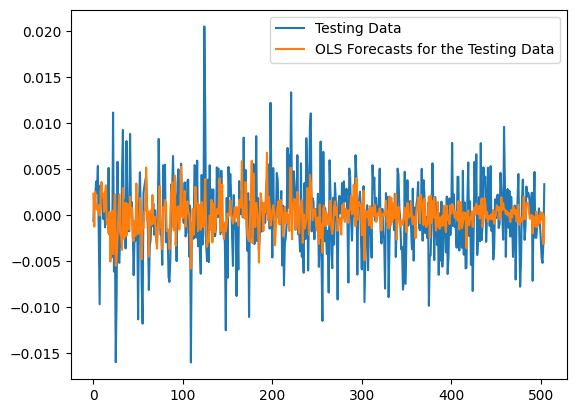

In [182]:
#Plot the testing data
plt.plot(Y_test)
#Plot the predictions
plt.plot(Y_test_pred_LR)
#Add a legend (where? ---> "upper right"), and give a name to each seris you plot, with the same way you called them above:
#e.x. the first legend name ("Testing Data") refers to the first data that we plot (Y_test)
plt.legend(["Testing Data", "OLS Forecasts for the Testing Data"], loc = "upper right")

# Ridge

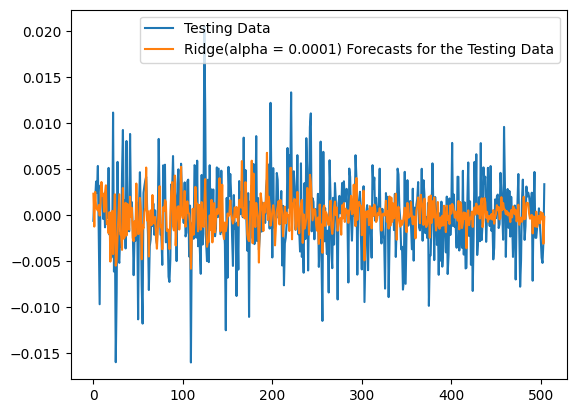

In [176]:
plt.plot(Y_test)
plt.plot(Y_test_pred_Ridge_2)
plt.legend(["Testing Data", "Ridge(alpha = 0.0001) Forecasts for the Testing Data"], loc = "upper right")

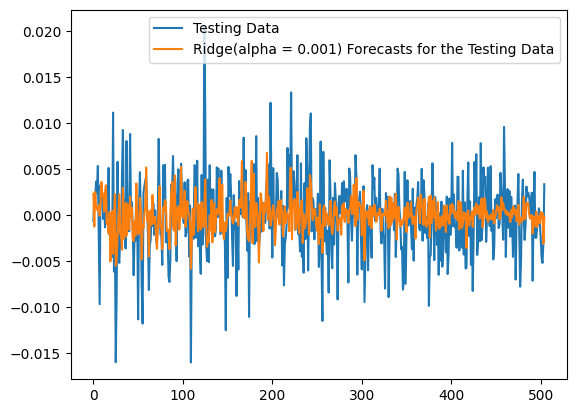

In [175]:
plt.plot(Y_test)
plt.plot(Y_test_pred_Ridge_3)
plt.legend(["Testing Data", "Ridge(alpha = 0.001) Forecasts for the Testing Data"], loc = "upper right")

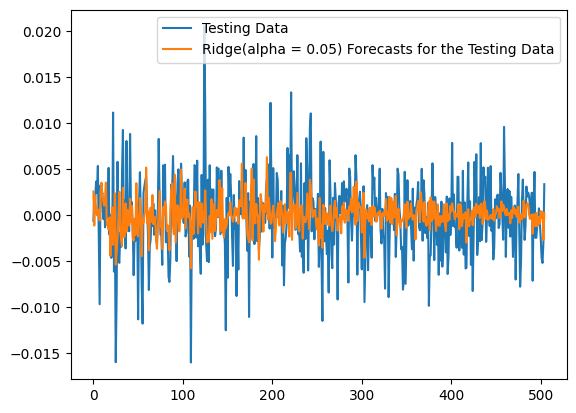

In [174]:
plt.plot(Y_test)
plt.plot(Y_test_pred_Ridge_4)
plt.legend(["Testing Data", "Ridge(alpha = 0.05) Forecasts for the Testing Data"], loc = "upper right")

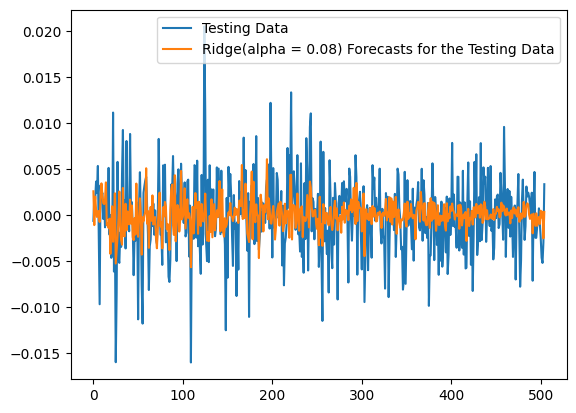

In [173]:
plt.plot(Y_test)
plt.plot(Y_test_pred_Ridge_5)
plt.legend(["Testing Data", "Ridge(alpha = 0.08) Forecasts for the Testing Data"], loc = "upper right")

# Lasso

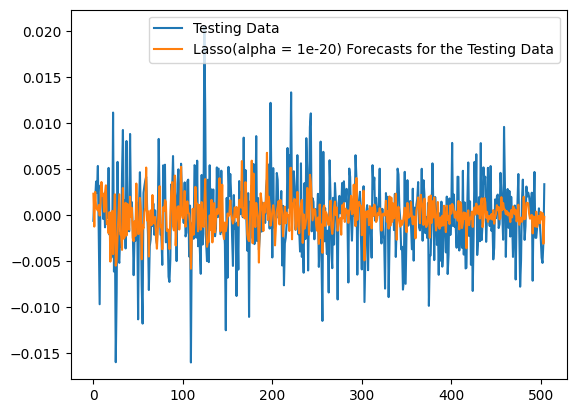

In [177]:
plt.plot(Y_test)
plt.plot(Y_test_pred_Lasso_1)
plt.legend(["Testing Data", "Lasso(alpha = 1e-20) Forecasts for the Testing Data"], loc = "upper right")

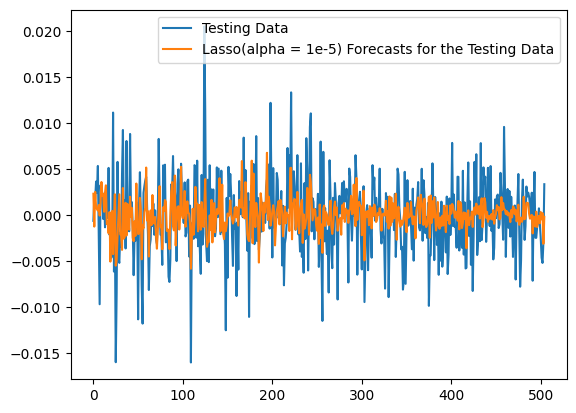

In [178]:
plt.plot(Y_test)
plt.plot(Y_test_pred_Lasso_1)
plt.legend(["Testing Data", "Lasso(alpha = 1e-5) Forecasts for the Testing Data"], loc = "upper right")

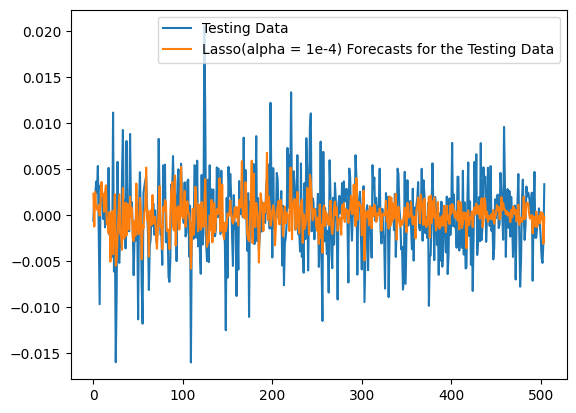

In [179]:
plt.plot(Y_test)
plt.plot(Y_test_pred_Lasso_1)
plt.legend(["Testing Data", "Lasso(alpha = 1e-4) Forecasts for the Testing Data"], loc = "upper right")

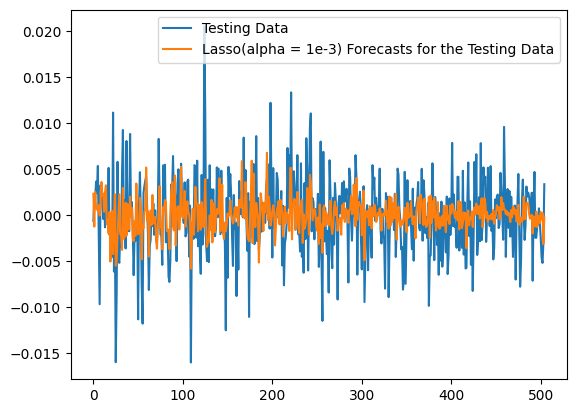

In [180]:
plt.plot(Y_test)
plt.plot(Y_test_pred_Lasso_1)
plt.legend(["Testing Data", "Lasso(alpha = 1e-3) Forecasts for the Testing Data"], loc = "upper right")

# Or combined Plots

# Ridge

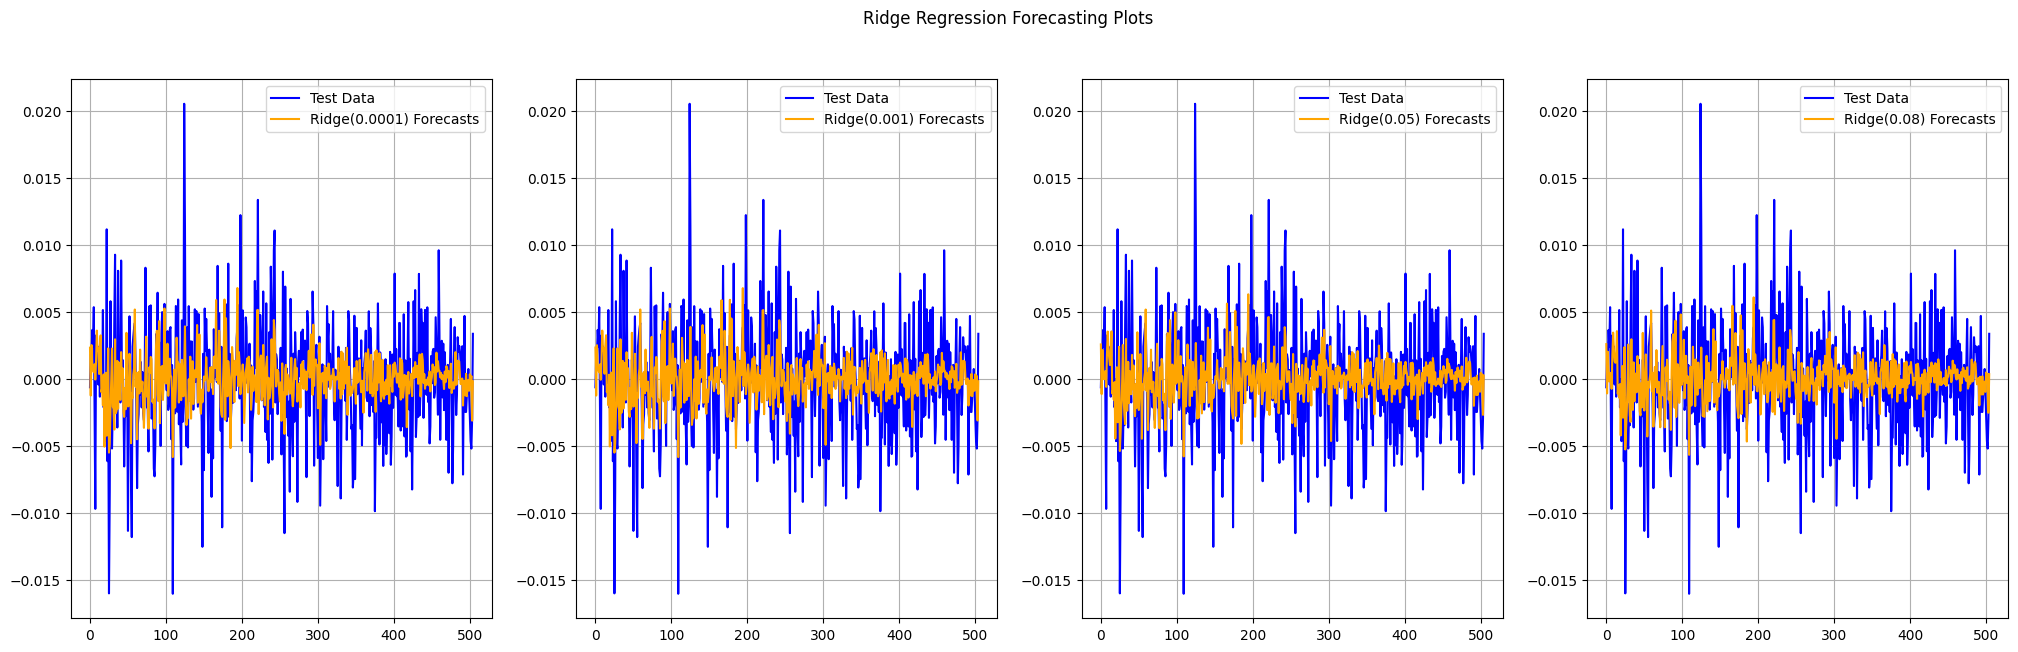

In [ ]:
fig, ax = plt.subplots(1, 4, figsize = (25, 7))
fig.suptitle("Ridge Regression Forecasting Plots")
ax[0].plot(Y_test, color = "blue", linestyle = "solid")
ax[0].plot(Y_test_pred_Ridge_2, color = "orange", linestyle = "solid")
ax[0].grid()
ax[0].legend(["Test Data", "Ridge(0.0001) Forecasts"], loc = "upper right")
ax[1].plot(Y_test, color = "blue", linestyle = "solid")
ax[1].plot(Y_test_pred_Ridge_3, color = "orange", linestyle = "solid")
ax[1].grid()
ax[1].legend(["Test Data", "Ridge(0.001) Forecasts"], loc = "upper right")
ax[2].plot(Y_test, color = "blue", linestyle = "solid")
ax[2].plot(Y_test_pred_Ridge_4, color = "orange", linestyle = "solid")
ax[2].grid()
ax[2].legend(["Test Data", "Ridge(0.05) Forecasts"], loc = "upper right")
ax[3].plot(Y_test, color = "blue", linestyle = "solid")
ax[3].plot(Y_test_pred_Ridge_5, color = "orange", linestyle = "solid")
ax[3].grid()
ax[3].legend(["Test Data", "Ridge(0.08) Forecasts"], loc = "upper right")
plt.show()

# Lasso

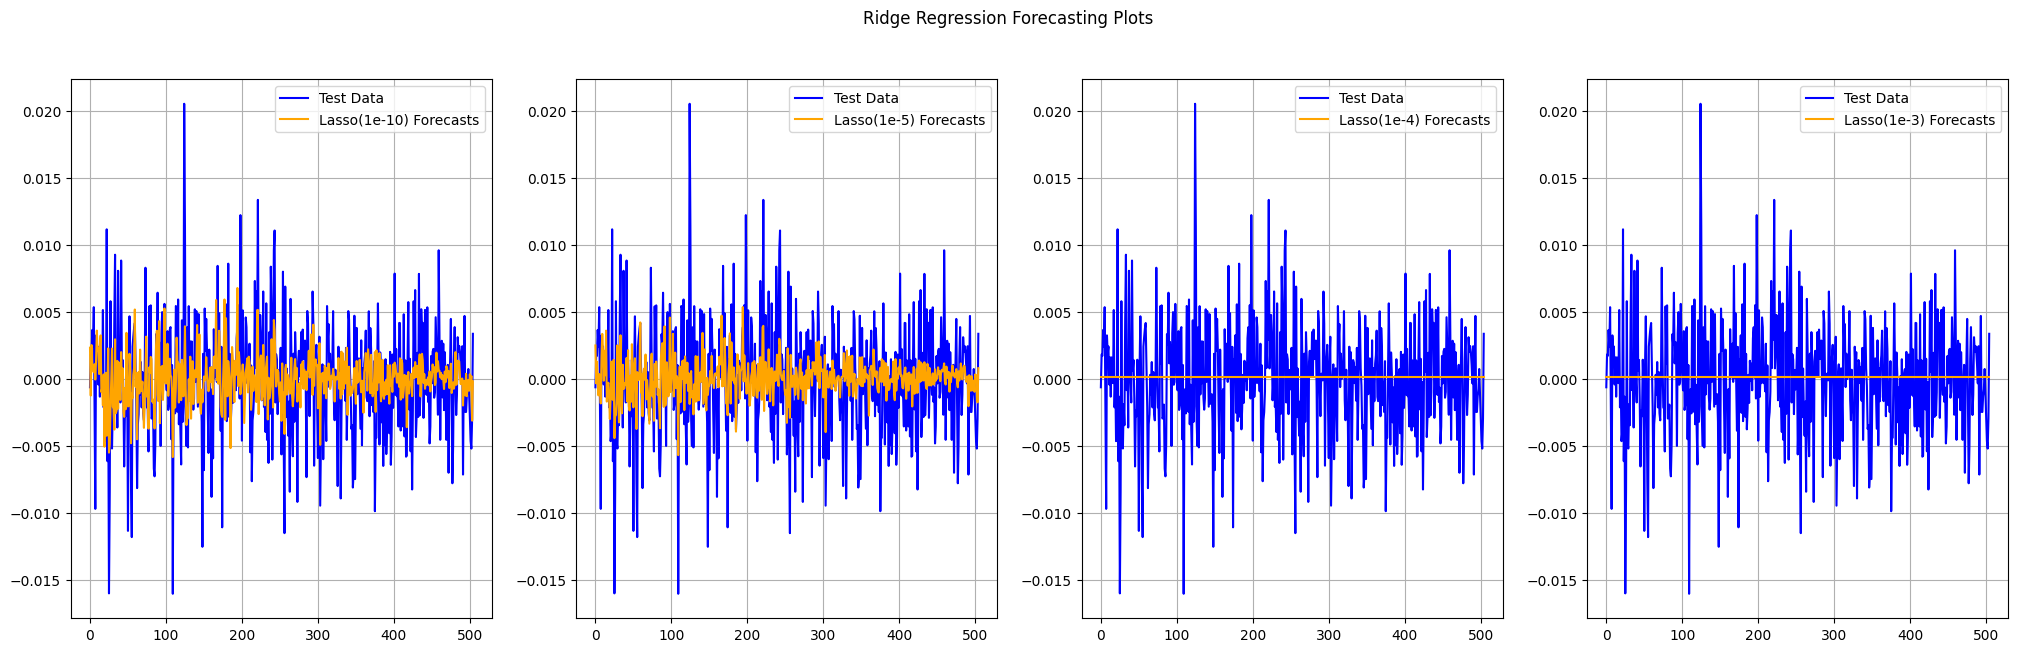

In [196]:
fig, ax = plt.subplots(1, 4, figsize = (25, 7))
fig.suptitle("Ridge Regression Forecasting Plots")
ax[0].plot(Y_test, color = "blue", linestyle = "solid")
ax[0].plot(Y_test_pred_Lasso_1, color = "orange", linestyle = "solid")
ax[0].grid()
ax[0].legend(["Test Data", "Lasso(1e-10) Forecasts"], loc = "upper right")
ax[1].plot(Y_test, color = "blue", linestyle = "solid")
ax[1].plot(Y_test_pred_Lasso_2, color = "orange", linestyle = "solid")
ax[1].grid()
ax[1].legend(["Test Data", "Lasso(1e-5) Forecasts"], loc = "upper right")
ax[2].plot(Y_test, color = "blue", linestyle = "solid")
ax[2].plot(Y_test_pred_Lasso_3, color = "orange", linestyle = "solid")
ax[2].grid()
ax[2].legend(["Test Data", "Lasso(1e-4) Forecasts"], loc = "upper right")
ax[3].plot(Y_test, color = "blue", linestyle = "solid")
ax[3].plot(Y_test_pred_Lasso_4, color = "orange", linestyle = "solid")
ax[3].grid()
ax[3].legend(["Test Data", "Lasso(1e-3) Forecasts"], loc = "upper right")
plt.show()